# 2.3 PageRank
## 2.3(a)

In [2]:
library('igraph')
library('Matrix')
library('pracma')

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [5]:
n <- 1000
g <- barabasi.game(n, m=4, directed=T)
#plot(g,vertex.size=0.5, vertex.label.cex=0.001)
dia <- diameter(g)
deg <- degree(g,mode=c("in"))

In [6]:
print (deg)

   [1] 310 252 123 190 148 161 165  48 116 125 181  37  33  70  13  40  71   5
  [19]  25   8   4  32  31  15   4  11   5   3  25  14  58  29   1   5  12  10
  [37]  18  10   5  21  11   3   8   1  27  18   0  38  33   2  25   0  36   8
  [55]  16   1   4   0   9   2   3   7   5  29   1  21   9  17  12   6   7   4
  [73]   2   7  13  19   0  22   0  12   6  32  18  14   7  16   0  10   0  15
  [91]  19   4   5   0   8   1   4   0  35  14   0   2   1   0   5  10   1  11
 [109]   0   1   0   1   3  13   2   1   5   0   1   2   3  11   1  12   0   3
 [127]   3   3   1  12   3   6   7   6   5   0   2   4   4   3   3   1   2   0
 [145]   1   4   2   6   5   1   2   6   6   1   2   8   3   4   2   1   2  11
 [163]   0  14   6   6   9   6   1   1   3   4   5   2   1   3   0   5   0   0
 [181]   3   0   8   4   2   3   0   2   5  10   1   0   7   3   1   3   7   4
 [199]   0   0   3   0   4   0   2   4   1   1   5   1   5   2   1   3   3   2
 [217]   0   8   2   9   3   0   2   0   8   4   7  

In [7]:
transition_matrix <- create_transition_matrix(g)
#print(transition_matrix)

In [8]:
p_init <- rep(1/n, n)
visits <- rep(0, n)
#visits[1] <- visits[1]+1
#print (visits)
#print (p_init)

In [9]:
for (i in 1:n){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}
#print (v)

In [10]:
visit_prob_a = visits/1000
print (visit_prob_a)

   [1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0

[1] 0.4996972


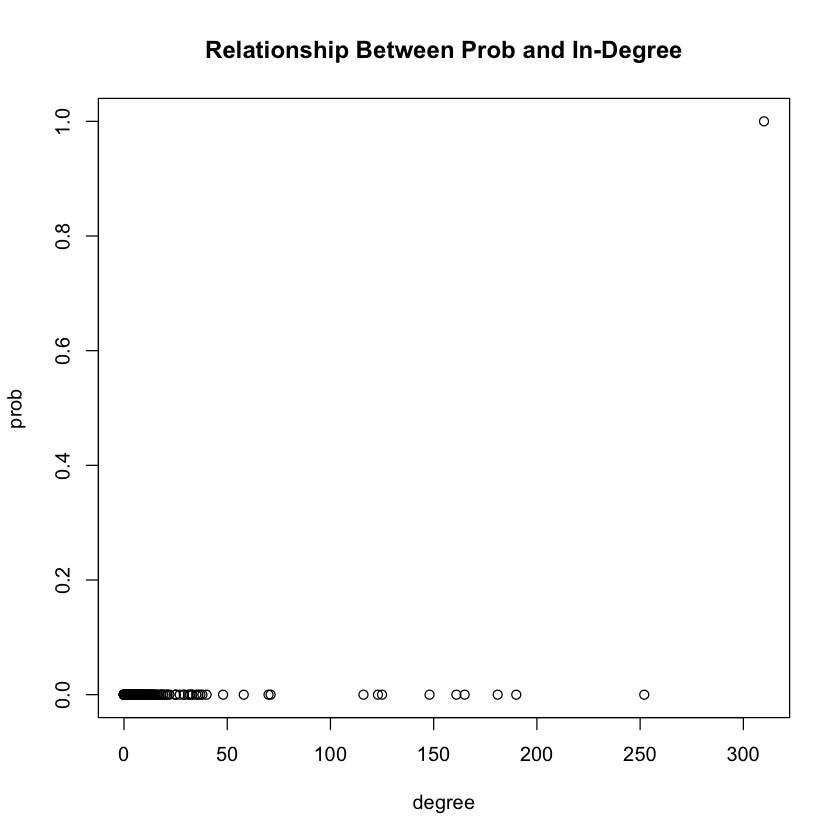

In [13]:
plot(deg,visit_prob_a,main="Relationship Between Prob and In-Degree",xlab="degree",ylab="prob",type="p")
cor=cor(deg,visit_prob_a) # count the probability correlation
print(cor)

### The first node has the probability of 100%, and the other nodes have the probability of 0%.

## 2.3(b)

In [14]:
tele_prob = 0.15

In [15]:
random_walk_with_teleportation = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        teleport = sample(0:1, 1, prob = c(1-tele_prob, tele_prob))
        if (teleport == 0){
            PMF = transition_matrix[v, ]
            }
        else {
            PMF = p_init
        }
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [16]:
visits <- rep(0, n)
for (i in 1:10000){
    v_init = sample(1:vcount(g), 1, prob = p_init)    
    v_last = random_walk_with_teleportation(g, dia*10, v_init, transition_matrix)
    #fprintf('%d\n', v_last)
    visits[v_last] <- visits[v_last]+1
}

In [23]:
#print(sum(visits))
#print(visits)

In [17]:
visit_prob_b = visits/10000
print (visit_prob_b)

   [1] 0.5943 0.0477 0.0205 0.0228 0.0108 0.0145 0.0156 0.0031 0.0073 0.0074
  [11] 0.0112 0.0022 0.0022 0.0035 0.0007 0.0025 0.0042 0.0007 0.0014 0.0001
  [21] 0.0004 0.0018 0.0013 0.0011 0.0002 0.0007 0.0002 0.0003 0.0013 0.0005
  [31] 0.0033 0.0011 0.0000 0.0011 0.0005 0.0009 0.0015 0.0009 0.0005 0.0009
  [41] 0.0016 0.0008 0.0006 0.0001 0.0015 0.0015 0.0003 0.0020 0.0016 0.0006
  [51] 0.0012 0.0000 0.0014 0.0006 0.0009 0.0003 0.0004 0.0001 0.0003 0.0003
  [61] 0.0004 0.0004 0.0009 0.0014 0.0001 0.0018 0.0009 0.0005 0.0006 0.0005
  [71] 0.0005 0.0004 0.0004 0.0005 0.0004 0.0007 0.0000 0.0009 0.0002 0.0007
  [81] 0.0004 0.0021 0.0010 0.0004 0.0005 0.0007 0.0000 0.0004 0.0001 0.0012
  [91] 0.0008 0.0002 0.0003 0.0001 0.0002 0.0005 0.0001 0.0001 0.0017 0.0007
 [101] 0.0001 0.0002 0.0001 0.0003 0.0004 0.0003 0.0003 0.0002 0.0000 0.0002
 [111] 0.0001 0.0002 0.0001 0.0012 0.0001 0.0002 0.0004 0.0002 0.0002 0.0003
 [121] 0.0003 0.0003 0.0003 0.0005 0.0003 0.0003 0.0002 0.0002 0.0000 0.0005

[1] 0.5792964


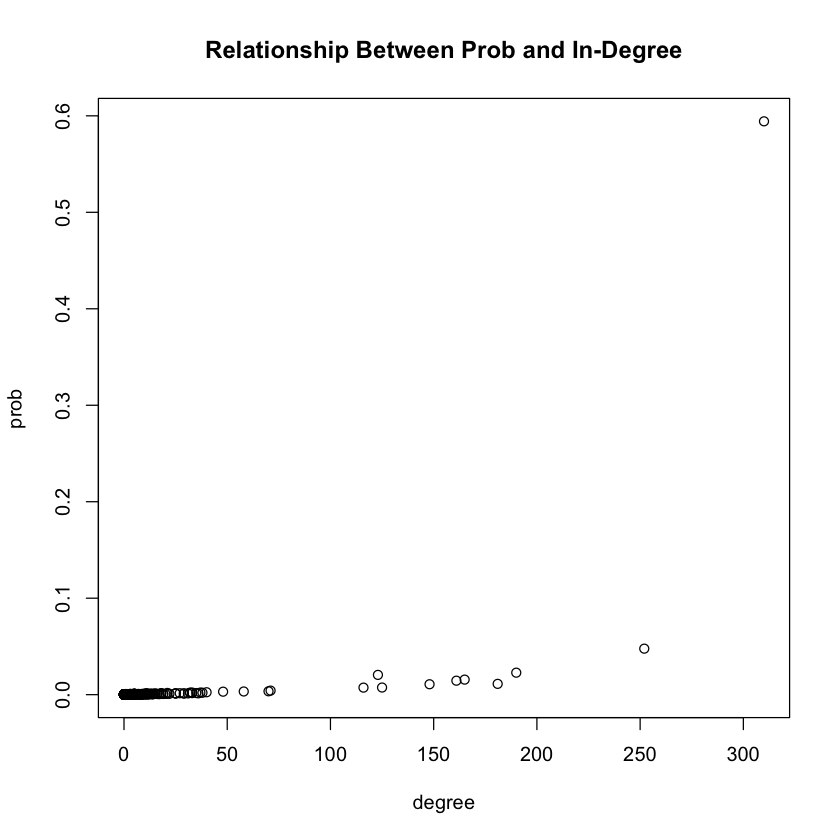

In [19]:
plot(deg,visit_prob_b,main="Relationship Between Prob and In-Degree",xlab="degree",ylab="prob",type="p")
cor=cor(deg,visit_prob_b) # count the probability correlation
print(cor)

In [15]:
page_rank(g)$vector

[1] 0.1796070765 0.0917710051 0.0615612872 0.0572874423 0.0022404648
   [6] 0.0305773480 0.0076427372 0.0320963834 0.0031211202 0.0106377637
  [11] 0.0102834564 0.0008611043 0.0111609853 0.0100605072 0.0029105050
  [16] 0.0035048811 0.0019718788 0.0087673627 0.0093894047 0.0057198926
  [21] 0.0009412933 0.0003806498 0.0024040995 0.0066083415 0.0007290588
  [26] 0.0010718170 0.0003669825 0.0023278186 0.0034858085 0.0016084285
  [31] 0.0015805290 0.0022394862 0.0041456219 0.0021525065 0.0004312991
  [36] 0.0013369058 0.0009221991 0.0050005432 0.0046605085 0.0003026660
  [41] 0.0005229501 0.0028422644 0.0012478015 0.0003026660 0.0016782916
  [46] 0.0022429125 0.0022533125 0.0014779322 0.0006973268 0.0011621400
  [51] 0.0003026660 0.0056170567 0.0010347589 0.0006350324 0.0013602885
  [56] 0.0003669825 0.0008241223 0.0008795274 0.0023342304 0.0015545611
  [61] 0.0004079843 0.0005229501 0.0011344942 0.0003669825 0.0003669825
  [66] 0.0008983860 0.0008442153 0.0021877289 0.0009588637 0.0003026660
  [71] 0.0011137610 0.0003806498 0.0003026660 0.0005783552 0.0004956156
  [76] 0.0005875664 0.0008445328 0.0003026660 0.0008651241 0.0007490428
  [81] 0.0005366174 0.0020938612 0.0004859681 0.0011544805 0.0016228396
  [86] 0.0003669825 0.0007662315 0.0005970950 0.0035276708 0.0016174275
  [91] 0.0011014814 0.0004449663 0.0033015104 0.0024105078 0.0005502846
  [96] 0.0005284413 0.0004956156 0.0009108190 0.0005735994 0.0006009339
 [101] 0.0010678967 0.0003669825 0.0005229501 0.0021054706 0.0007324536
 [106] 0.0004449663 0.0003026660 0.0003026660 0.0008345678 0.0006454572
 [111] 0.0008241223 0.0006215253 0.0009969574 0.0027102370 0.0014211220
 [116] 0.0005083483 0.0005092829 0.0013446440 0.0005901709 0.0006990107
 [121] 0.0006297398 0.0005264716 0.0012919651 0.0003669825 0.0005092829
 [126] 0.0008305481 0.0006550992 0.0006204098 0.0019225582 0.0003669825
 [131] 0.0005735994 0.0004673465 0.0003669825 0.0007559669 0.0003026660
 [136] 0.0003026660 0.0015353065 0.0014542375 0.0003669825 0.0003026660
 [141] 0.0004507749 0.0011291334 0.0009282897 0.0008160650 0.0003026660
 [146] 0.0004956156 0.0005639519 0.0009788379 0.0005735994 0.0003026660
 [151] 0.0004673465 0.0003026660 0.0006340770 0.0003026660 0.0003026660
 [156] 0.0003669825 0.0006885652 0.0003943171 0.0004489861 0.0004079843
 [161] 0.0003026660 0.0003026660 0.0004449663 0.0005279429 0.0005531889
 [166] 0.0005121872 0.0014450117 0.0003806498 0.0003669825 0.0003026660
 [171] 0.0008326312 0.0003026660 0.0008648067 0.0003972214 0.0003669825
 [176] 0.0003943171 0.0006408202 0.0012743380 0.0006443417 0.0004478706
 [181] 0.0007324713 0.0004888724 0.0009903368 0.0003669825 0.0004312991
 [186] 0.0006067425 0.0004449663 0.0007353578 0.0010356132 0.0003669825
 [191] 0.0003835541 0.0003026660 0.0003806498 0.0007149651 0.0008914827
 [196] 0.0008543611 0.0003026660 0.0003669825 0.0005901709 0.0005385871
 [201] 0.0005316630 0.0006009339 0.0003026660 0.0004547947 0.0005229501
 [206] 0.0003806498 0.0010648169 0.0004312991 0.0013558433 0.0004478706
 [211] 0.0003026660 0.0003669825 0.0003026660 0.0005599321 0.0003026660
 [216] 0.0004723009 0.0003026660 0.0010063089 0.0008308655 0.0003026660
 [221] 0.0006009339 0.0003026660 0.0004312991 0.0005765037 0.0003026660
 [226] 0.0003669825 0.0005872667 0.0003669825 0.0003669825 0.0004956156
 [231] 0.0003026660 0.0003806498 0.0005872667 0.0004586336 0.0005901709
 [236] 0.0003669825 0.0004312991 0.0007158997 0.0004312991 0.0003026660
 [241] 0.0003026660 0.0003943171 0.0003026660 0.0003669825 0.0003026660
 [246] 0.0004956156 0.0003972214 0.0004956156 0.0012301145 0.0003806498
 [251] 0.0004996354 0.0003026660 0.0008572654 0.0005599321 0.0004312991
 [256] 0.0003669825 0.0005599321 0.0003669825 0.0006885652 0.0005761862
 [261] 0.0004312991 0.0004312991 0.0003026660 0.0003026660 0.0003669825
 [266] 0.0003026660 0.0003972214 0.0004507749 0.0004449663 0.0003669825
 [271] 0.0003669825 0.0003893627 0.0003806498 0.0004449663 0.0004723009
 [276] 0.0004449663 0.0004956156 0.00043129